In [1]:
#check the version of the gwosc package 
import gwosc
print(gwosc.__version__)

0.7.1


In [2]:
import gwpy
print(gwpy.__version__)

3.0.4


In [3]:
from gwosc.datasets import event_gps
gps = event_gps('GW170817')
print(gps)

1187008882.4


In [4]:
segment = (int(gps)-10, int(gps)+5)
print(segment)

(1187008872, 1187008887)


In [5]:
from gwpy.timeseries import TimeSeries
ldata = TimeSeries.fetch_open_data('L1', *segment, verbose=True)
print(ldata)

hdata = TimeSeries.fetch_open_data('H1', *segment, verbose=True)
print(hdata)

vdata = TimeSeries.fetch_open_data('V1', *segment, verbose=True)
print(vdata)

Fetched 1 URLs from gwosc.org for [1187008872 .. 1187008887))
Reading data... [Done]
TimeSeries([-2.09714023e-20, -2.49173979e-20, -1.74310832e-20,
            ...,  6.43515284e-20,  6.80497504e-20,
             6.83906719e-20]
           unit: dimensionless,
           t0: 1187008872.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)
Fetched 1 URLs from gwosc.org for [1187008872 .. 1187008887))
Reading data... [Done]
TimeSeries([-2.48460985e-19, -2.38289551e-19, -2.43131379e-19,
            ..., -3.65035985e-19, -3.80810766e-19,
            -3.83224728e-19]
           unit: dimensionless,
           t0: 1187008872.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)
Fetched 1 URLs from gwosc.org for [1187008872 .. 1187008887))
Reading data... [Done]
TimeSeries([-7.79014998e-19, -7.76501206e-19, -7.91675222e-19,
            ..., -8.25076268e-20, -9.29713914e-20,
            -9.33250111e-20]
           unit: dimen

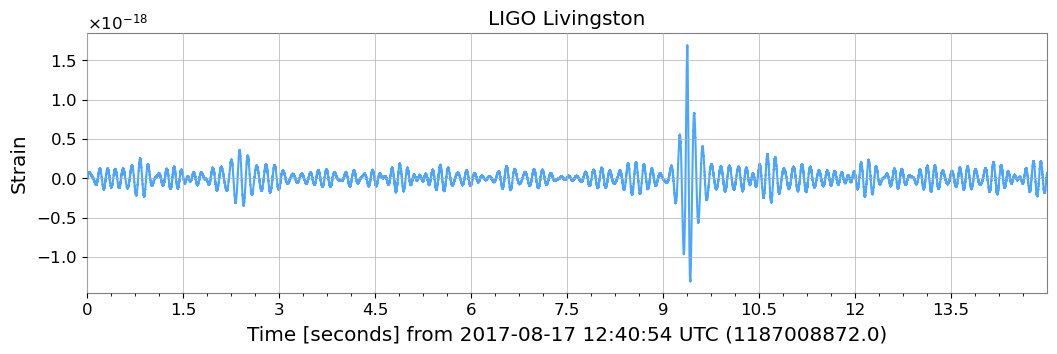

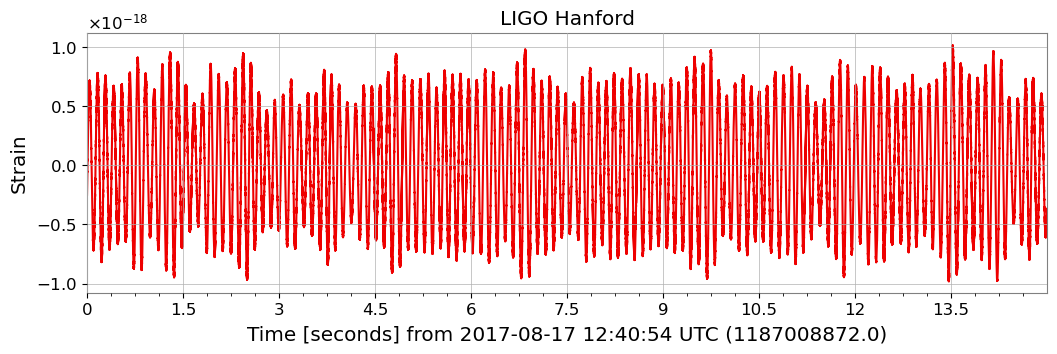

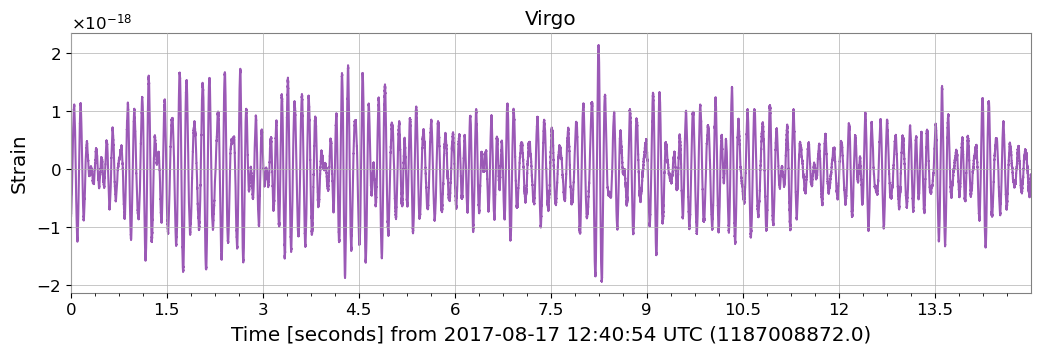

In [6]:
#Plotting time series
plotl = ldata.plot(title="LIGO Livingston", color='gwpy:ligo-livingston', ylabel='Strain')
ploth = hdata.plot(title="LIGO Hanford", color='gwpy:ligo-hanford', ylabel='Strain')
plotv = vdata.plot(title="Virgo", color='gwpy:virgo', ylabel='Strain')

In [7]:
#Plotting Fourier transforms
import gwpy
print(gwpy.__version__)

3.0.4


In [8]:
from gwosc.datasets import event_gps
gps = event_gps('GW170817')
print(gps)

1187008882.4


In [9]:
segment = (int(gps)-10, int(gps)+5)
print(segment)

(1187008872, 1187008887)


In [10]:
from gwpy.timeseries import TimeSeries
ldata = TimeSeries.fetch_open_data('L1', *segment, verbose=True)
print(ldata)

hdata = TimeSeries.fetch_open_data('H1', *segment, verbose=True)
print(hdata)

vdata = TimeSeries.fetch_open_data('V1', *segment, verbose=True)
print(vdata)

Fetched 1 URLs from gwosc.org for [1187008872 .. 1187008887))
Reading data... [Done]
TimeSeries([-2.09714023e-20, -2.49173979e-20, -1.74310832e-20,
            ...,  6.43515284e-20,  6.80497504e-20,
             6.83906719e-20]
           unit: dimensionless,
           t0: 1187008872.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)
Fetched 1 URLs from gwosc.org for [1187008872 .. 1187008887))
Reading data... [Done]
TimeSeries([-2.48460985e-19, -2.38289551e-19, -2.43131379e-19,
            ..., -3.65035985e-19, -3.80810766e-19,
            -3.83224728e-19]
           unit: dimensionless,
           t0: 1187008872.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)
Fetched 1 URLs from gwosc.org for [1187008872 .. 1187008887))
Reading data... [Done]
TimeSeries([-7.79014998e-19, -7.76501206e-19, -7.91675222e-19,
            ..., -8.25076268e-20, -9.29713914e-20,
            -9.33250111e-20]
           unit: dimen

In [11]:
# Fourier transform data

lfft = ldata.fft()
print(lfft)

hfft = hdata.fft()
print(hfft)

vfft = vdata.fft()
print(vfft)

FrequencySeries([-7.79482487e-24+0.00000000e+00j,
                 -1.55624567e-23-5.97713124e-24j,
                 -5.56546305e-24-1.62158670e-23j, ...,
                 -1.21871233e-24+3.25550340e-26j,
                 -1.25351490e-24-1.28314618e-27j,
                 -1.20876944e-24+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.06666666666666667 Hz,
                epoch: 1187008872.0,
                name: Strain,
                channel: None)
FrequencySeries([8.81505601e-22+0.00000000e+00j,
                 3.41685746e-21+1.31986733e-22j,
                 8.39753108e-22-2.80949227e-21j, ...,
                 1.91000299e-24+3.93585776e-26j,
                 1.95380684e-24-6.51369838e-26j,
                 1.95734394e-24+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.06666666666666667 Hz,
                epoch: 1187008872.0,
                name: Strain,
             

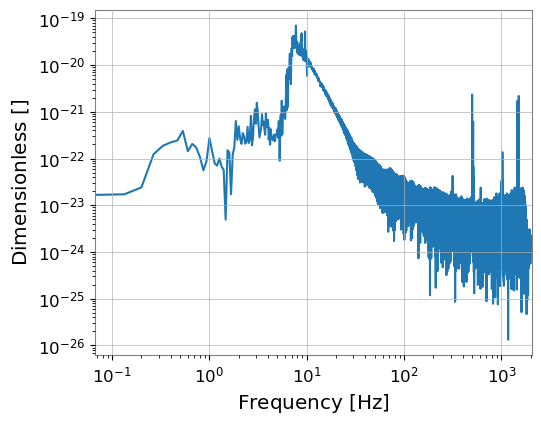

In [12]:
plot = lfft.abs().plot(xscale="log", yscale="log")
plot.show(warn=False)

In [13]:
# Adding window function
from scipy.signal import get_window

lwindow = get_window('hann', ldata.size)
lwin = ldata * lwindow

hwindow = get_window('hann', hdata.size)
hwin = hdata * hwindow

vwindow = get_window('hann', vdata.size)
vwin = vdata * vwindow

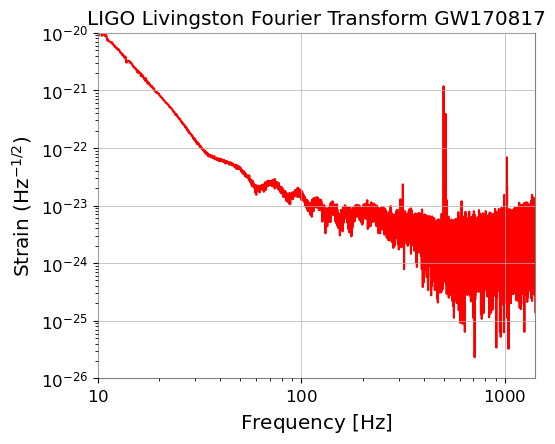

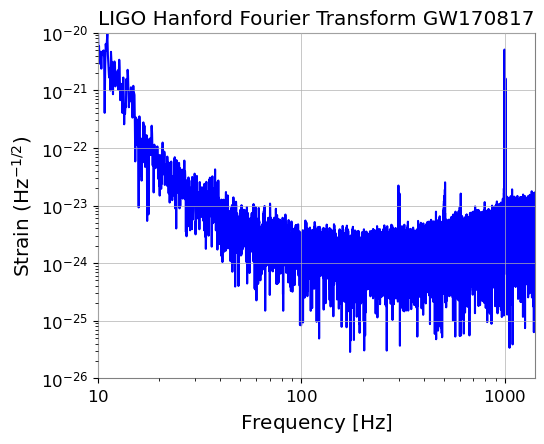

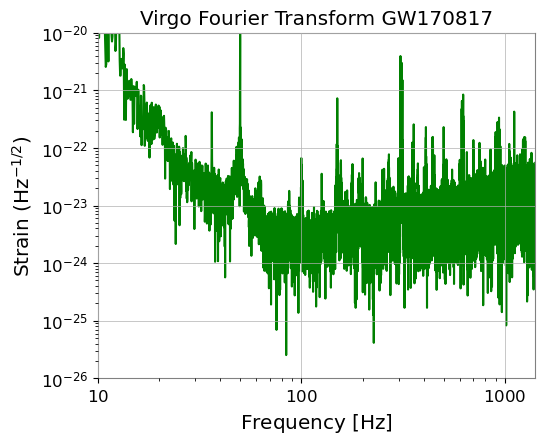

In [14]:
#Plot the Fourier transform with window function
lfftamp = lwin.fft().abs()
lplot = lfftamp.plot(title="LIGO Livingston Fourier Transform GW170817", color='Red', xscale="log", yscale="log", xlim=(10, 1400), ylim=(1e-26, 1e-20), ylabel="Strain (Hz$^{-1/2}$)")
lplot.show(warn=False)

hfftamp = hwin.fft().abs()
hplot = hfftamp.plot(title="LIGO Hanford Fourier Transform GW170817", color='Blue', xscale="log", yscale="log", xlim=(10, 1400), ylim=(1e-26, 1e-20), ylabel="Strain (Hz$^{-1/2}$)")
hplot.show(warn=False)

vfftamp = vwin.fft().abs()
vplot = vfftamp.plot(title="Virgo Fourier Transform GW170817", color='Green', xscale="log", yscale="log", xlim=(10, 1400), ylim=(1e-26, 1e-20), ylabel="Strain (Hz$^{-1/2}$)")
vplot.show(warn=False)

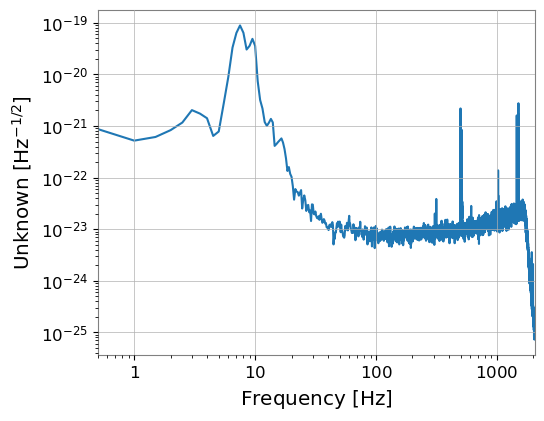

In [15]:
#Sample Amplitude Spectral Density for Livingston
asd = ldata.asd(fftlength=2, method="median")
plot = asd.plot()
plot.show(warn=False)

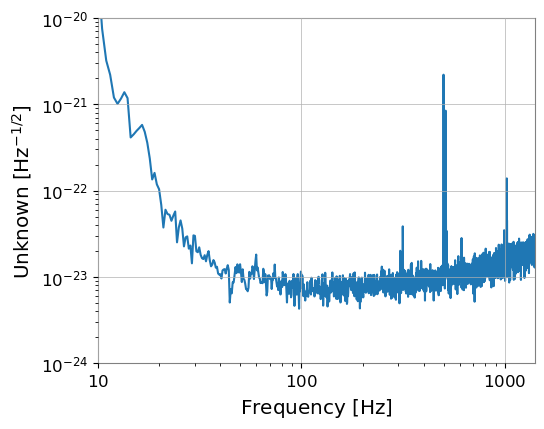

In [16]:
ax = plot.gca()
ax.set(xlim=(10, 1400), ylim=(1e-24, 1e-20))
plot

In [ ]:
ldata2 = TimeSeries.fetch_open_data('L1', int(gps)-512, int(gps)+512, cache=True)
lasd2 = ldata2.asd(fftlength=4, method="median")
plot = lasd2.plot()
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-24, 1e-20)
plot.show(warn=False)

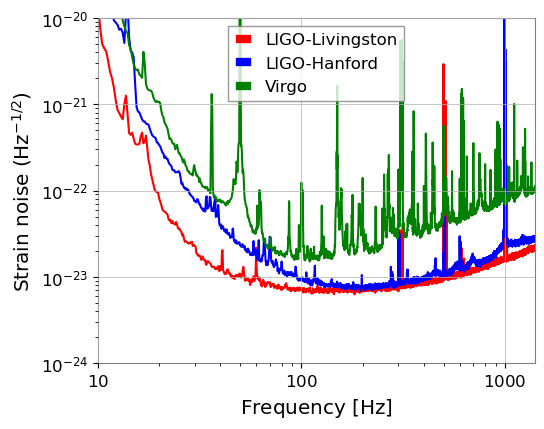

In [19]:
# Plotting with data from Hanford and Virgo added
hdata2 = TimeSeries.fetch_open_data('H1', int(gps)-512, int(gps)+512, cache=True)
hasd2 = hdata2.asd(fftlength=4, method="median")

vdata2 = TimeSeries.fetch_open_data('V1', int(gps)-512, int(gps)+512, cache=True)
vasd2 = vdata2.asd(fftlength=4, method="median")

ax.plot(hasd2, label='LIGO-Hanford', color='Blue')
ax.plot(vasd2, label='Virgo', color='Green')

lline = ax.lines[0]
lline.set_color('Red')  # change colour of Livingston data
lline.set_label('LIGO-Livingston')

ax.set_ylabel(r'Strain noise (Hz$^{-1/2}$)')
ax.legend()
plot

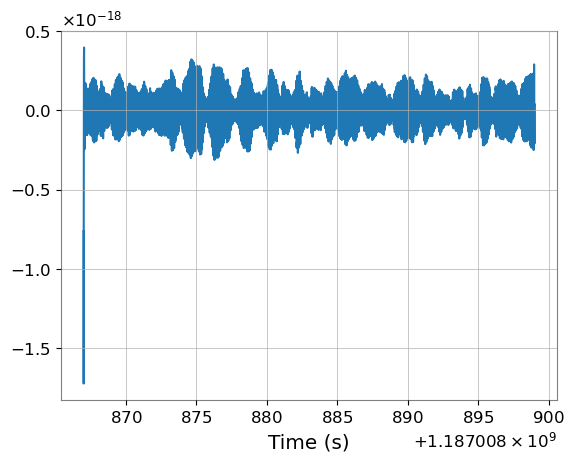

In [20]:
# Whitening the data via ASD
import pylab
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass

merger = Merger("GW170817")

strain = merger.strain('V1')

# Remove the low frequency content and downsample the data to 2048Hz
strain = highpass(strain, 15.0)
strain = resample_to_delta_t(strain, 1.0/2048)

pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.show()

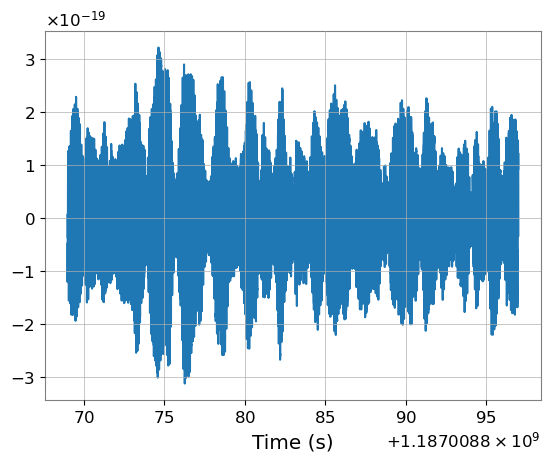

In [21]:
# Removing 2 seconds of data from both the beginning and end
conditioned = strain.crop(2, 2)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

In [22]:
# Estimate the power spectral density using 4 second samples via Wech method
from pycbc.psd import interpolate, inverse_spectrum_truncation

psd = conditioned.psd(4)
psd = interpolate(psd, conditioned.delta_f)
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

In [24]:
# Generating waveform
from pycbc.waveform import get_td_waveform

m = 1.4 # Solar masses
hp, hc = get_td_waveform(approximant="IMRPhenomPv2_NRTidal",
                     mass1=m,
                     mass2=m,
                     delta_t=conditioned.delta_t,
                     f_lower=20)

# Resize the vector to match our data
hp.resize(len(conditioned))

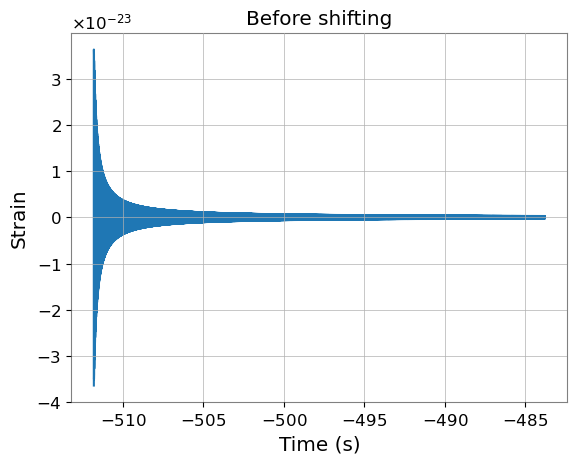

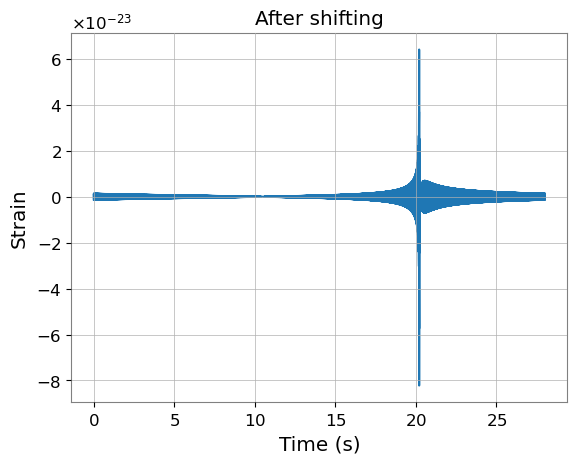

In [25]:
pylab.figure()
pylab.title('Before shifting')
pylab.plot(hp.sample_times, hp)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

template = hp.cyclic_time_shift(hp.start_time)

pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()

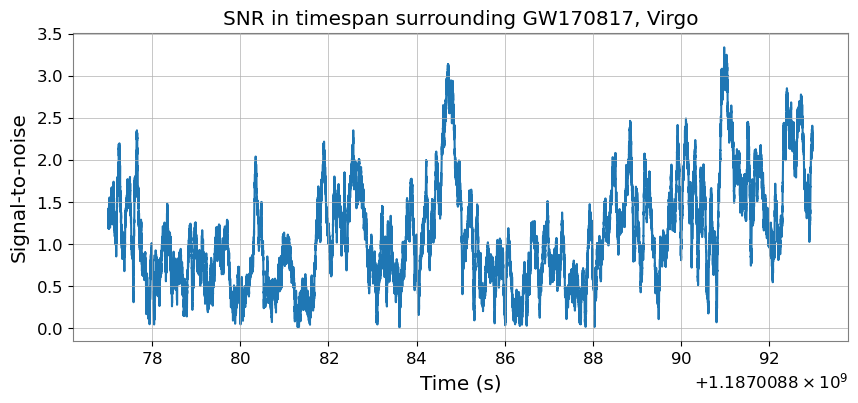

There is a signal at 1187008890.9868164s with SNR 3.33980935358582


In [26]:
# Matched filtering
from pycbc.filter import matched_filter
import numpy

snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4)
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.title("SNR in timespan surrounding GW170817, Virgo")
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("There is a signal at {}s with SNR {}".format(time, abs(snrp)))

In [28]:
# Generating Q-transforms
import gwpy

In [29]:
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries

gps = event_gps('GW170817')
print("GW170817 GPS:", gps)

GW170817 GPS: 1187008882.4


In [30]:
segment = (int(gps) - 30, int(gps) + 2)
hdata = TimeSeries.fetch_open_data('H1', *segment, verbose=True, cache=True)

Fetched 1 URLs from gwosc.org for [1187008852 .. 1187008884))
Reading data... [Done]


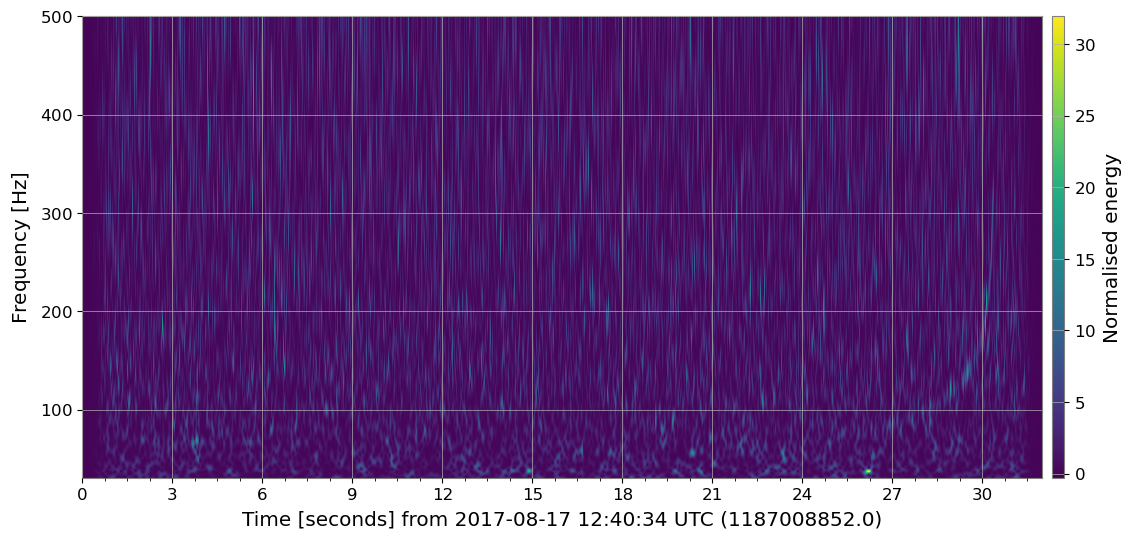

In [31]:
hq = hdata.q_transform(frange=(30, 500))
plot = hq.plot()
plot.colorbar(label="Normalised energy")

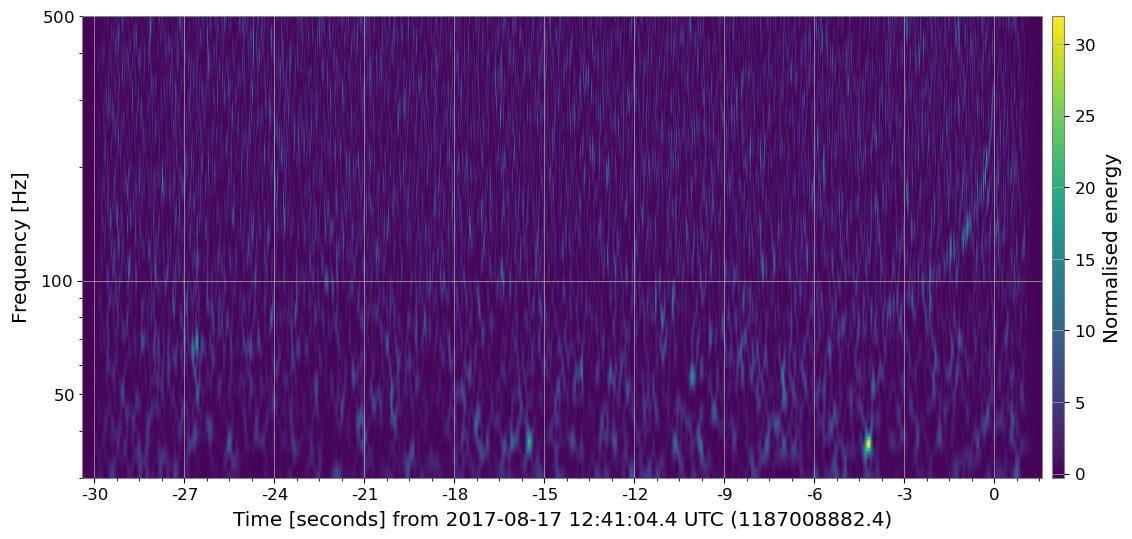

In [32]:
ax = plot.gca()
ax.set_epoch(gps)
ax.set_ylim(30, 500)
ax.set_yscale("log")
plot  

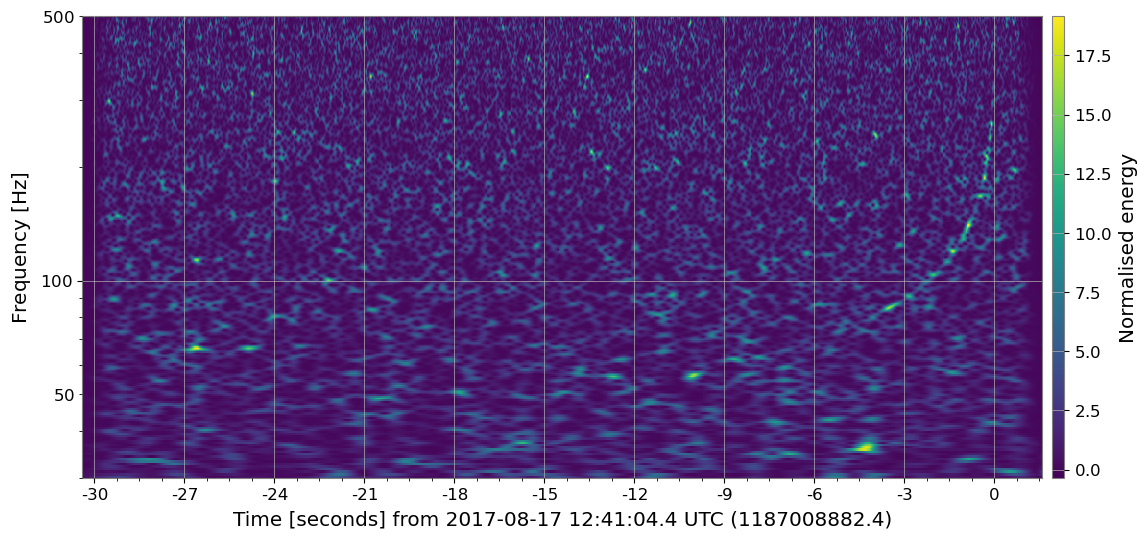

In [33]:
hq = hdata.q_transform(frange=(30, 500), qrange=(100, 110))
plot = hq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

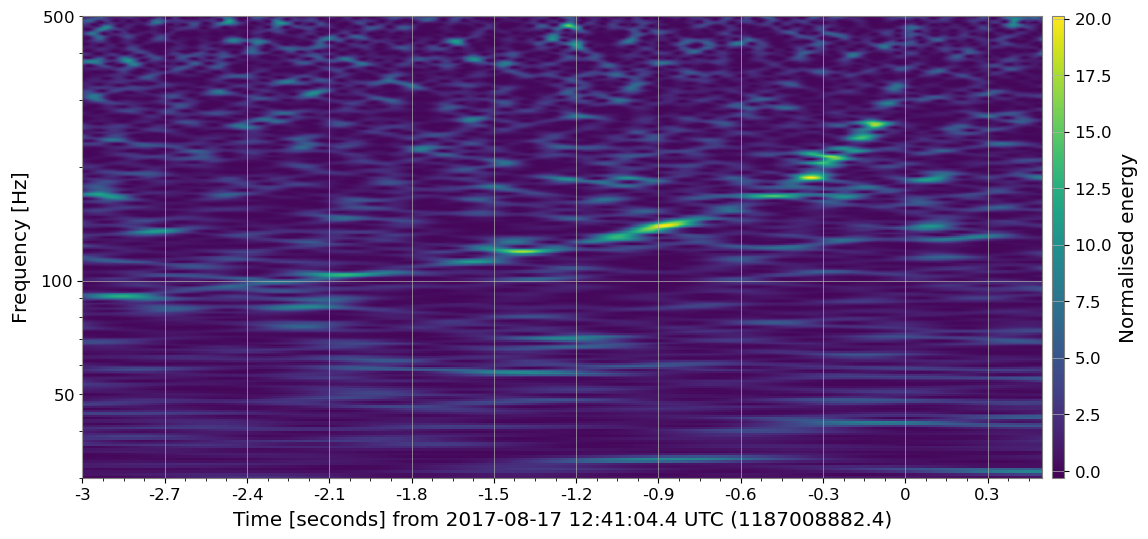

In [34]:
# Using outseg for small time range
hq2 = hdata.q_transform(frange=(30, 500), qrange=(80, 110), outseg=(gps-3,gps+0.5)) 
plot = hq2.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

In [35]:
# Same exercise for Livingston
ldata = TimeSeries.fetch_open_data('L1', *segment, verbose=True)

Fetched 1 URLs from gwosc.org for [1187008852 .. 1187008884))
Reading data... [Done]


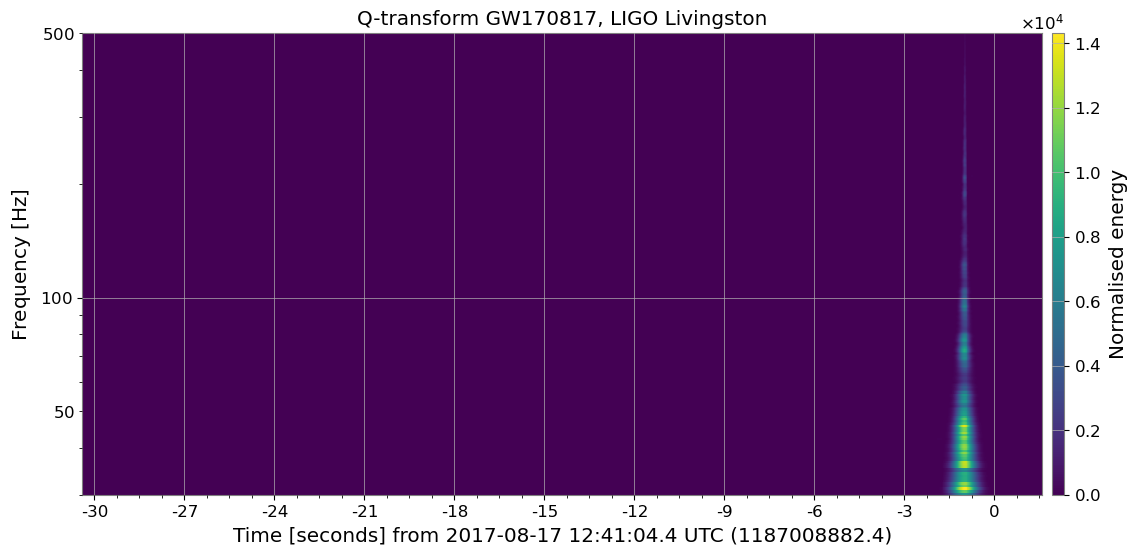

In [36]:
lq = ldata.q_transform(frange=(30, 500), qrange=(100, 110))
plot = lq.plot(title="Q-transform GW170817, LIGO Livingston")
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

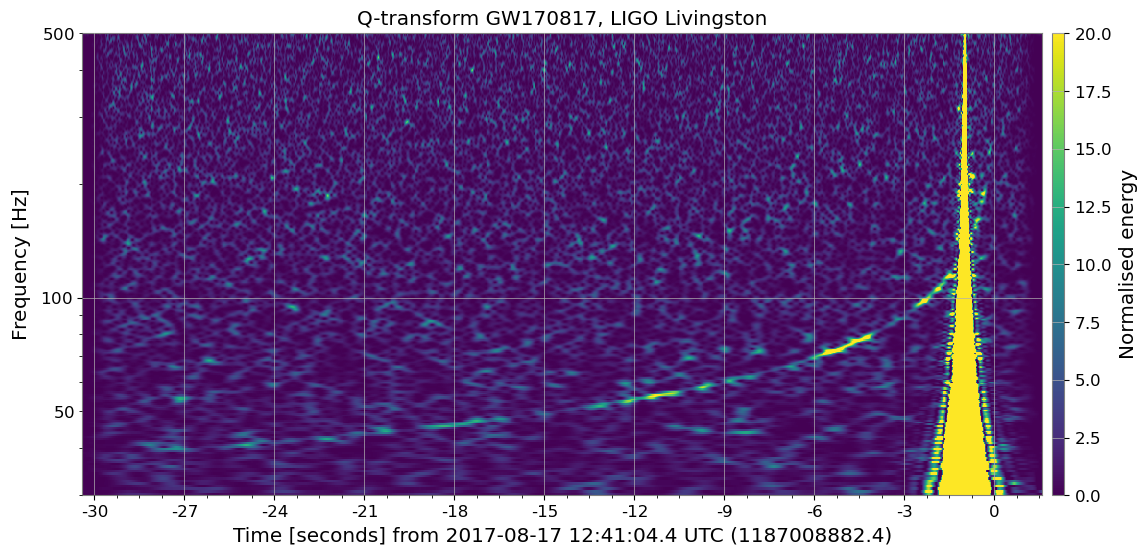

In [37]:
plot.colorbars[0].mappable.set_clim(0,20)
plot.refresh()
plot

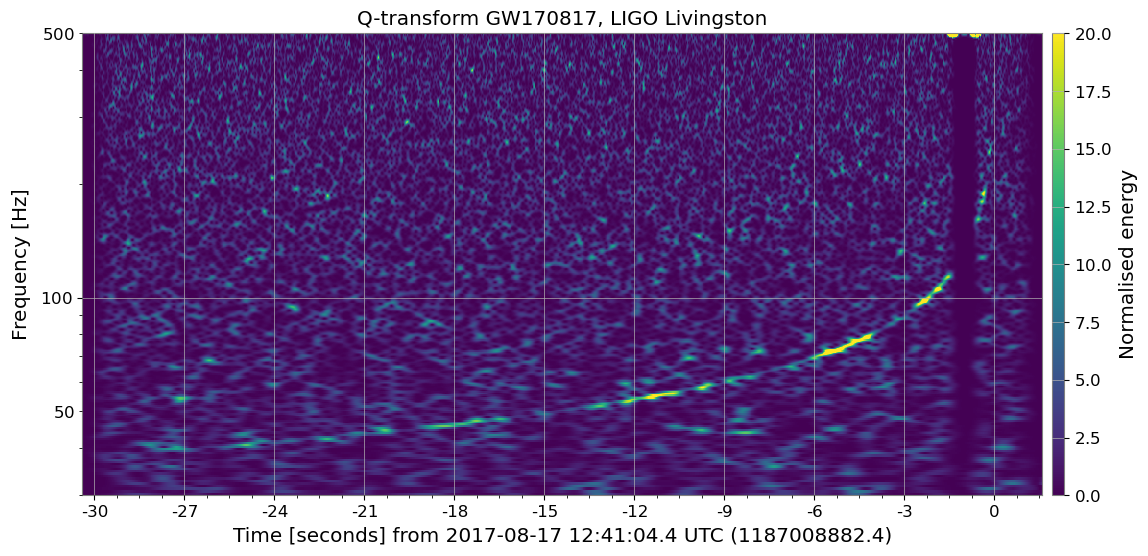

In [38]:
# Gating large glitch at t = -1.3
gated_ldata = ldata.gate(tzero=0.25, tpad=0.25)

gated_lq = gated_ldata.q_transform(frange=(30, 500), qrange=(100, 110))
plot = gated_lq.plot(title="Q-transform GW170817, LIGO Livingston")
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")
plot.colorbars[0].mappable.set_clim(0,20)

In [39]:
# And now for Virgo
segment = (int(gps) - 30, int(gps) + 2)
vdata = TimeSeries.fetch_open_data('V1', *segment, verbose=True, cache=True)

Fetched 1 URLs from gwosc.org for [1187008852 .. 1187008884))
Reading data... [Done]


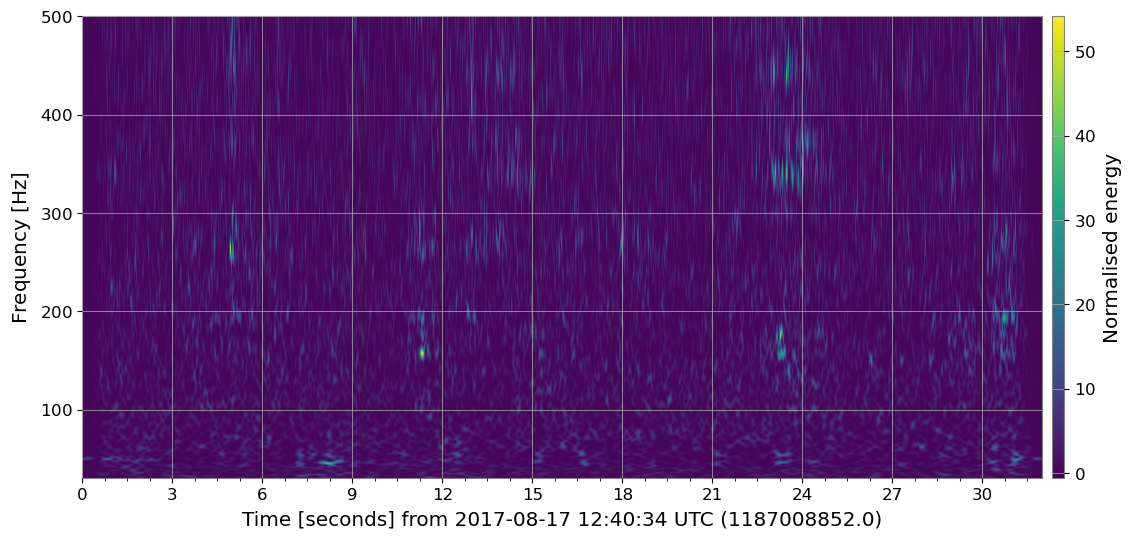

In [40]:
vq = vdata.q_transform(frange=(30, 500))
vplot = vq.plot()
vplot.colorbar(label="Normalised energy")

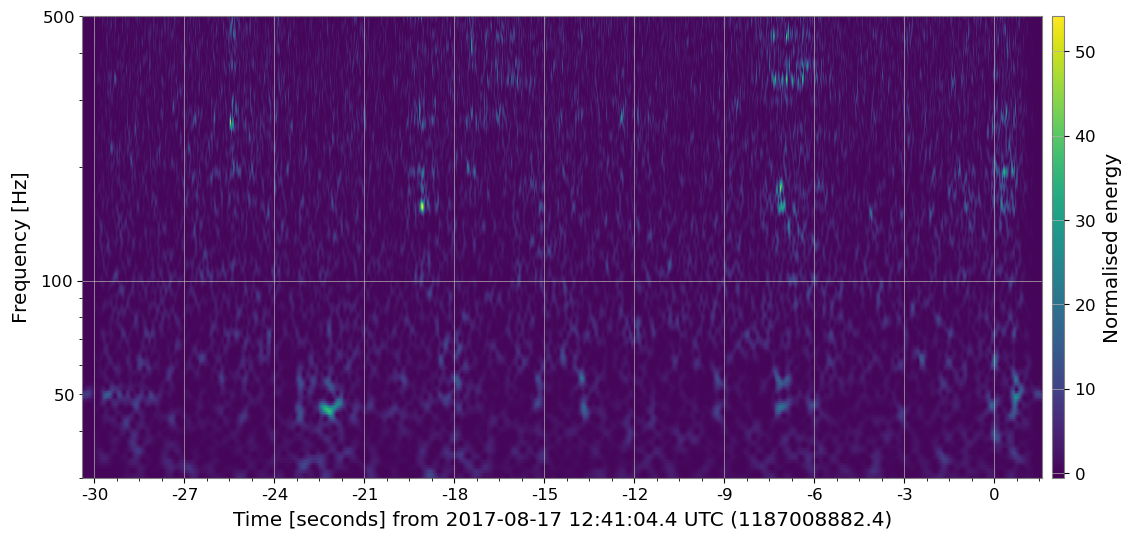

In [42]:
vax = vplot.gca()
vax.set_epoch(gps)
vax.set_ylim(30, 500)
vax.set_yscale("log")
vplot 

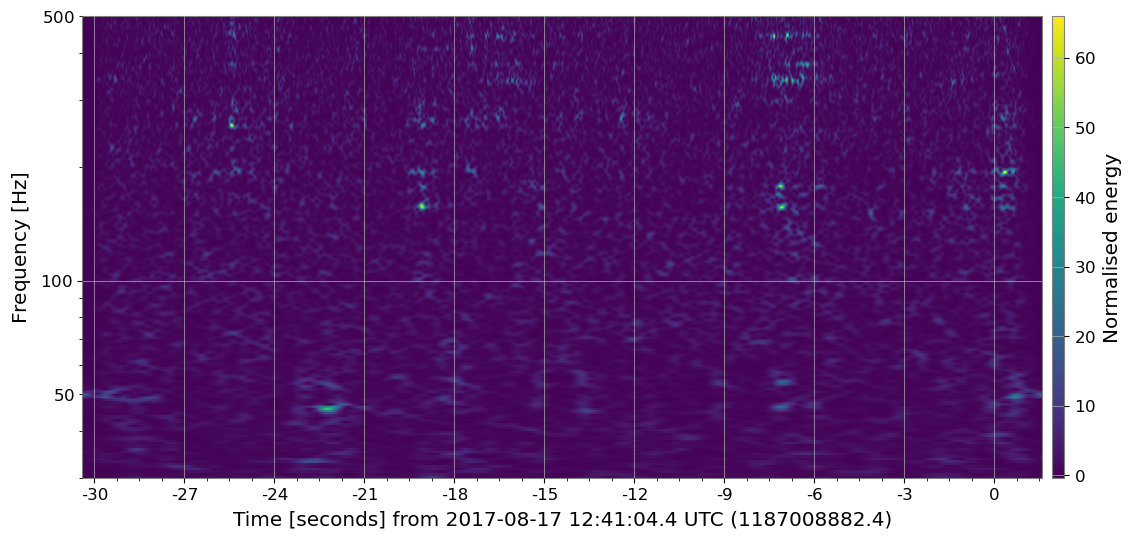

In [43]:
vq = vdata.q_transform(frange=(30, 500), qrange=(100, 110))
vplot = vq.plot()
vax = vplot.gca()
vax.set_epoch(gps)
vax.set_yscale('log')
vax.colorbar(label="Normalised energy")

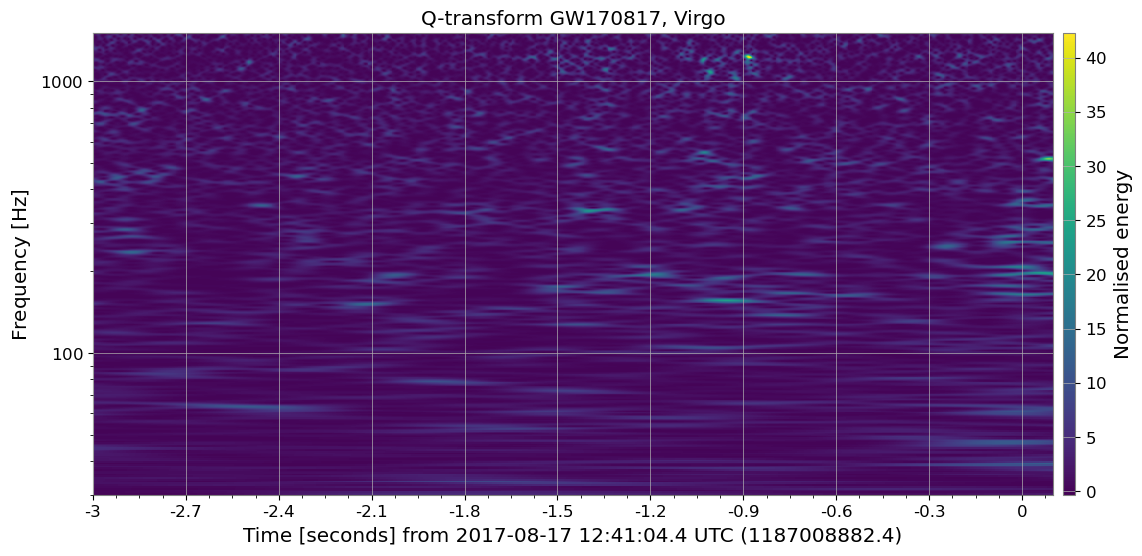

In [44]:
# Using outseg
vq2 = vdata.q_transform(frange=(30, 1500), qrange=(80, 110), outseg=(gps-3,gps+0.1)) 
vplot = vq2.plot(title="Q-transform GW170817, Virgo")
vax = vplot.gca()
vax.set_epoch(gps)
vax.set_yscale('log')
vax.colorbar(label="Normalised energy")